In [4]:
#!pip install pmdarima

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm

<Axes: xlabel='Date'>

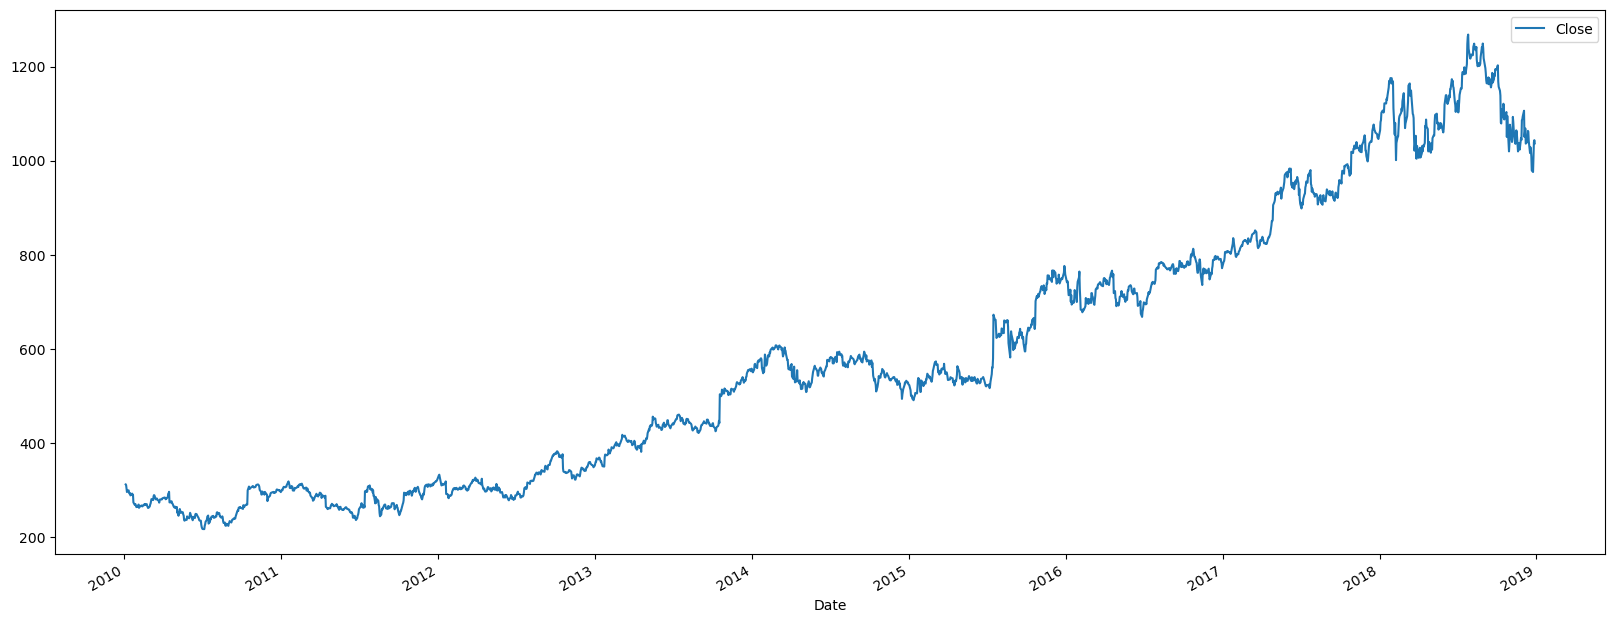

In [6]:
df = pd.read_csv("../Data/sp500sub.csv",
                 index_col = 'Date',
                 parse_dates = True)
goog = df[df['Name'] == 'GOOG'][['Close']].copy()
goog.plot(figsize = (20, 8))

In [7]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [8]:
model = pm.auto_arima(train,
                     trace = True,
                     suppress_warnings = True,
                     seasonal = False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16241.457, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16270.383, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16269.726, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16269.492, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16271.123, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=16268.065, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16267.873, Time=0.27 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=16241.127, Time=1.02 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=16266.968, Time=0.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=16243.213, Time=1.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=16243.976, Time=1.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=16241.204, Time=1.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=16255.943, Time=0.73 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=16242.451, Time=1.26 sec
 ARIMA(3,1,2)(0,0,0

/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


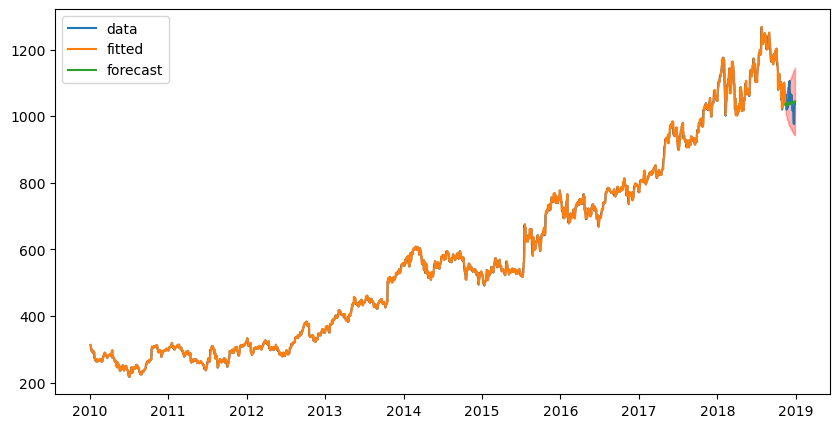

In [9]:
def plot_result(model, fulldata, train, test):
    params = model.get_params()
    d = params['order'][1] # get differencing order
    
    train_pred = model.predict_in_sample(start = d, end = -1)
    test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(fulldata.index, fulldata, label = 'data')
    ax.plot(train.index[d:], train_pred, label = 'fitted')
    ax.plot(test.index, test_pred , label = 'forecast')
    ax.fill_between(test.index, \
                   confint[:,0], confint[:,1], \
                   color = 'red', alpha = 0.3)
    ax.legend();

    
plot_result(model, goog, train, test)

/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


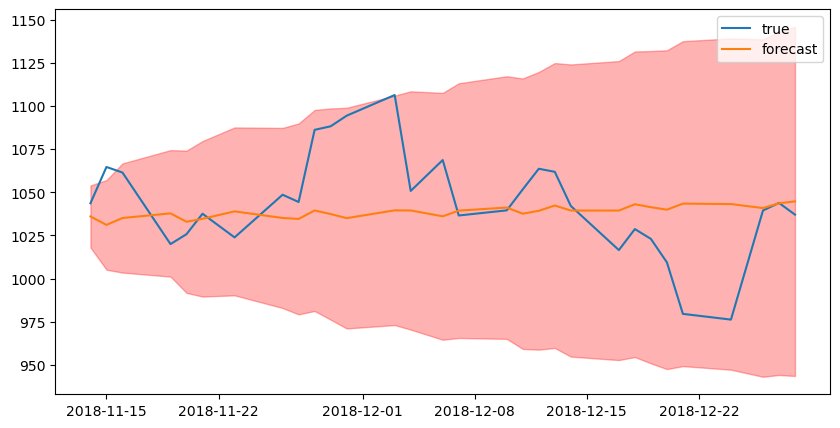

In [10]:
def plot_test(model, test):

    test_pred, confint = model.predict(n_periods = Ntest, return_conf_int = True)
    
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(test.index, test , label = 'true')
    ax.plot(test.index, test_pred , label = 'forecast')
    ax.fill_between(test.index, \
                   confint[:,0], confint[:,1], \
                   color = 'red', alpha = 0.3)
    ax.legend();
    
    
plot_test(model, test)

In [11]:
model.predict(Ntest)

/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yunjaecho/Git/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


2233    1036.016353
2234    1031.120552
2235    1035.122168
2236    1037.818742
2237    1032.948401
2238    1034.665614
2239    1038.964199
2240    1035.146658
2241    1034.590200
2242    1039.487374
2243    1037.419909
2244    1035.056457
2245    1039.556630
2246    1039.495922
2247    1036.095628
2248    1039.410041
2249    1041.176838
2250    1037.619862
2251    1039.298657
2252    1042.369428
2253    1039.455071
2254    1039.434412
2255    1043.090473
2256    1041.386910
2257    1039.952541
2258    1043.449345
2259    1043.208977
2260    1040.894193
2261    1043.614221
2262    1044.763269
dtype: float64

In [26]:
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

print("RMSE ARIMA", rmse(model.predict(Ntest).values, test['Close']))
print("RMSE Naive", rmse(train.iloc[-1], test))

RMSE ARIMA 30.857217121240133
RMSE Naive 30.029502477261467


/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yunjaecho/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
